# PCA:

PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_excel('PCA India Data_Census.xlsx')

In [3]:
df.head(5)

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [4]:
df.tail(5)

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [6]:
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,17.114062,320.500000,51222.871875,79940.576563,122372.084375,12309.098438,11942.300000,13820.946875,20778.392188,6191.807813,...,1392.973438,2757.050000,250.889062,558.098438,560.690625,1293.431250,71.379688,200.742188,510.014063,704.778125
std,9.426486,184.896367,48135.405475,73384.511114,113600.717282,11500.906881,11326.294567,14426.373130,21727.887713,9912.668948,...,1489.707052,2788.776676,453.336594,1117.642748,762.578991,1585.377936,107.897627,309.740854,610.603187,910.209225
min,1.000000,1.000000,350.000000,391.000000,698.000000,56.000000,56.000000,0.000000,0.000000,0.000000,...,4.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,9.000000,160.750000,19484.000000,30228.000000,46517.750000,4733.750000,4672.250000,3466.250000,5603.250000,293.750000,...,489.500000,957.250000,47.000000,109.000000,136.500000,298.000000,14.000000,43.000000,161.000000,220.500000
50%,18.000000,320.500000,35837.000000,58339.000000,87724.500000,9159.000000,8663.000000,9591.500000,13709.000000,2333.500000,...,949.000000,1928.000000,114.500000,247.500000,308.000000,717.000000,35.000000,113.000000,326.000000,464.500000
75%,24.000000,480.250000,68892.000000,107918.500000,164251.750000,16520.250000,15902.250000,19429.750000,29180.000000,7658.000000,...,1714.000000,3599.750000,270.750000,568.750000,642.000000,1710.750000,79.000000,240.000000,604.500000,853.500000
max,35.000000,640.000000,310450.000000,485417.000000,750392.000000,96223.000000,95129.000000,103307.000000,156429.000000,96785.000000,...,9875.000000,21611.000000,5775.000000,17153.000000,6116.000000,13714.000000,895.000000,3354.000000,6456.000000,10533.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [12]:
df['State Code'] = df['State Code'].astype('object') 
df['State Code']

0       1
1       1
2       1
3       1
4       1
       ..
635    34
636    34
637    35
638    35
639    35
Name: State Code, Length: 640, dtype: object

In [13]:
df['Dist.Code'] = df['Dist.Code'].astype('object') 
df['Dist.Code']

0        1
1        2
2        3
3        4
4        5
      ... 
635    636
636    637
637    638
638    639
639    640
Name: Dist.Code, Length: 640, dtype: object

In [14]:
gender_ratio = df.groupby('State').agg({'TOT_M': 'sum', 'TOT_F': 'sum'})
gender_ratio

,TOT_M,TOT_F
State,,
Andaman & Nicobar Island,18726,28691
Andhra Pradesh,3274363,6097235
Arunachal Pradesh,50582,88066
Assam,1437268,2093432
Bihar,4025198,5405883
Chandigarh,41753,59644
Chhattisgarh,838404,1526592
Dadara & Nagar Havelli,6982,10831
Daman & Diu,13153,18706


In [15]:
gender_ratio['gender_ratio'] = gender_ratio['TOT_M'] / gender_ratio['TOT_F']

In [16]:
gender_ratio.sort_values(by='gender_ratio', ascending=False)

,TOT_M,TOT_F,gender_ratio
State,,,
Lakshadweep,12823,14772,0.868061
Haryana,1167816,1498873,0.779129
NCT of Delhi,833414,1075266,0.775077
Uttar Pradesh,9043969,12023885,0.752167
Meghalaya,268036,356355,0.752160
Bihar,4025198,5405883,0.744596
Punjab,1579405,2121425,0.744502
Jammu & Kashmir,421213,572959,0.735154
Daman & Diu,13153,18706,0.703143


In [17]:
gender_ratio = df.groupby('Dist.Code').agg({'TOT_M': 'sum', 'TOT_F': 'sum'})
gender_ratio

,TOT_M,TOT_F
Dist.Code,,
1,23388,29796
2,19585,23102
3,6546,10964
4,2784,4206
5,20591,29981
...,...,...
636,8154,11781
637,12346,21691
638,1549,2630


In [18]:
gender_ratio['gender_ratio'] = gender_ratio['TOT_M'] / gender_ratio['TOT_F']

In [19]:
gender_ratio.sort_values(by='gender_ratio', ascending=False)

,TOT_M,TOT_F,gender_ratio
Dist.Code,,,
587,12823,14772,0.868061
2,19585,23102,0.847762
144,67258,79378,0.847313
106,31904,37671,0.846911
139,54807,64937,0.844003
...,...,...,...
391,8672,19209,0.451455
546,123111,273534,0.450076
625,66704,148445,0.449352


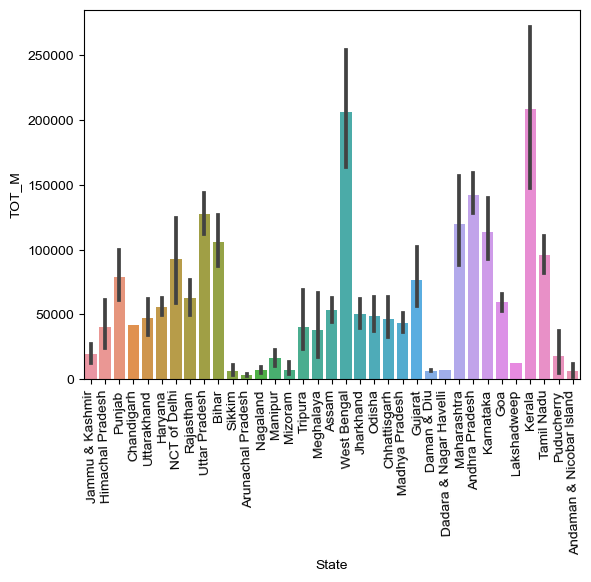

In [20]:
sns.barplot(x='State',y='TOT_M',data=df)
figsize=(50,5)
plt.xticks(rotation=92)
sns.set(font_scale=1);

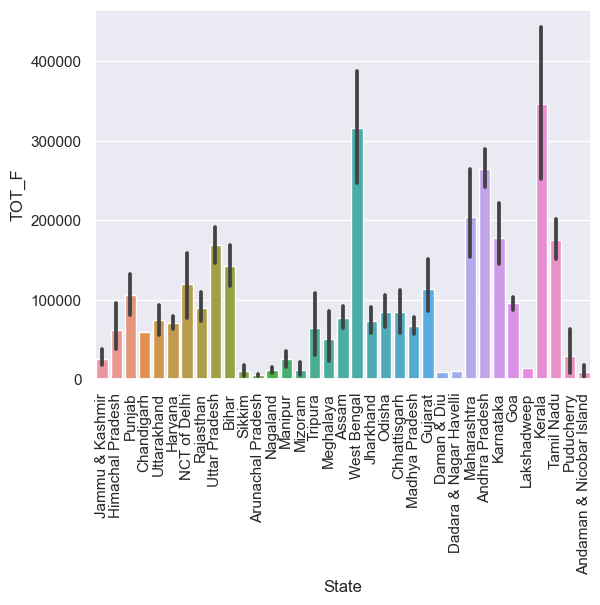

In [21]:
sns.barplot(x='State',y='TOT_F',data=df)
figsize=(50,4)
plt.xticks(rotation=90)
sns.set(font_scale=1);

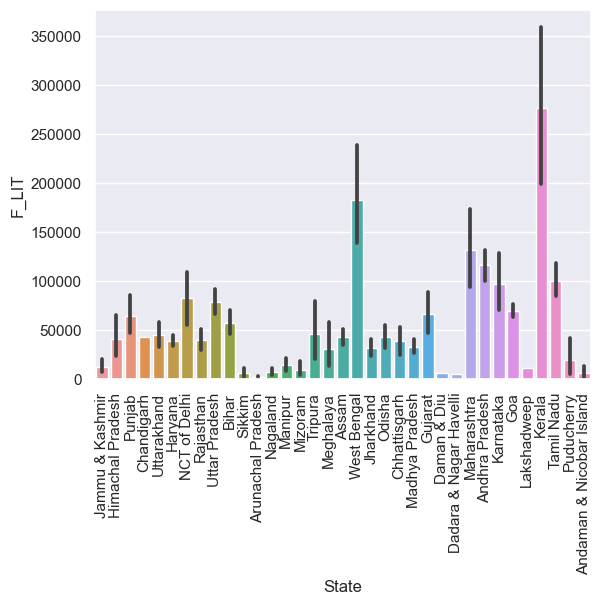

In [22]:
sns.barplot(x='State',y='F_LIT',data=df)
figsize=(50,4)
plt.xticks(rotation=90)
sns.set(font_scale=1);

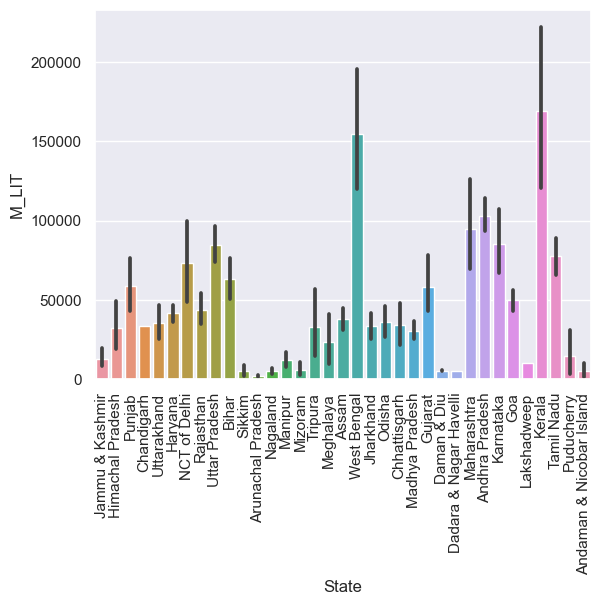

In [23]:
sns.barplot(x='State',y='M_LIT',data=df)
figsize=(50,5)
plt.xticks(rotation=90)
sns.set(font_scale=1);

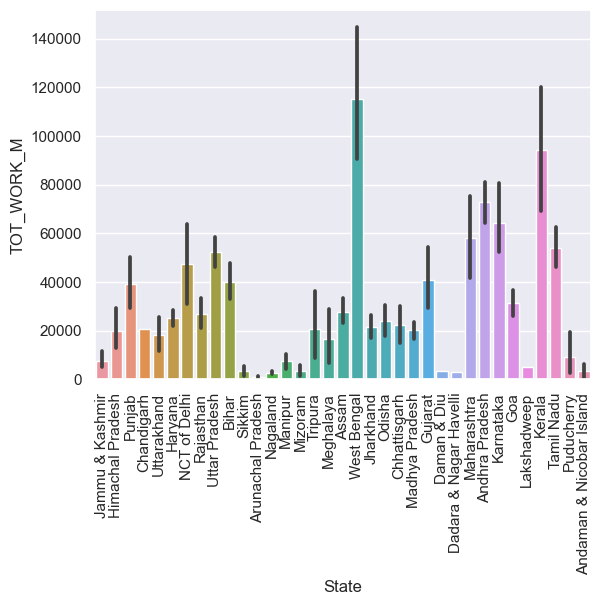

In [24]:
sns.barplot(x='State',y='TOT_WORK_M',data=df)
figsize=(50,5)
plt.xticks(rotation=90)
sns.set(font_scale=1);

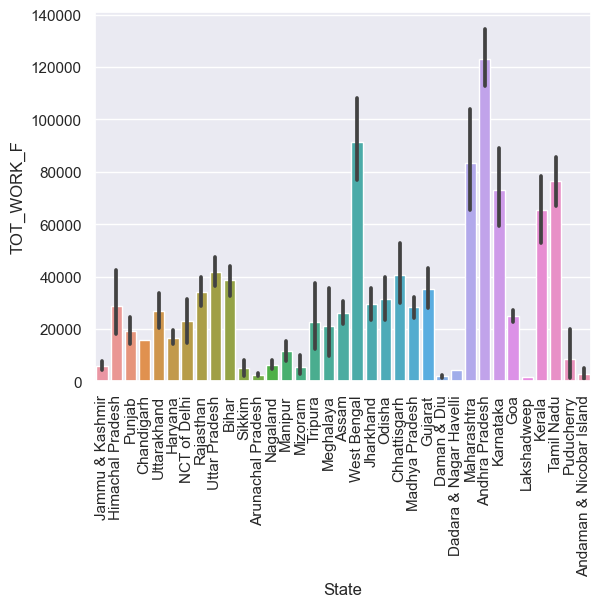

In [25]:
sns.barplot(x='State',y='TOT_WORK_F',data=df)
figsize=(50,5)
plt.xticks(rotation=90)
sns.set(font_scale=1);

In [26]:
df1 = df.drop(['State','Area Name','State Code','Dist.Code'],axis=1)

In [27]:
df = df.select_dtypes(include = ['float64', 'int64'])
listnumericcolumns = list(df.columns.values)
len(listnumericcolumns)

57

The description statistics for 'No_HH' column is:


count       640.000000
mean      51222.871875
std       48135.405475
min         350.000000
25%       19484.000000
50%       35837.000000
75%       68892.000000
max      310450.000000
Name: No_HH, dtype: float64


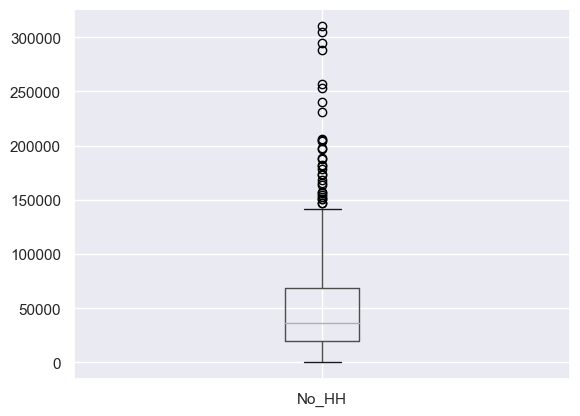

The description statistics for 'TOT_M' column is:


count       640.000000
mean      79940.576563
std       73384.511114
min         391.000000
25%       30228.000000
50%       58339.000000
75%      107918.500000
max      485417.000000
Name: TOT_M, dtype: float64


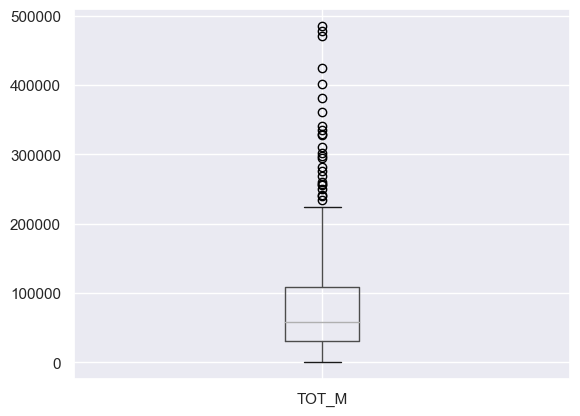

The description statistics for 'TOT_F' column is:


count       640.000000
mean     122372.084375
std      113600.717282
min         698.000000
25%       46517.750000
50%       87724.500000
75%      164251.750000
max      750392.000000
Name: TOT_F, dtype: float64


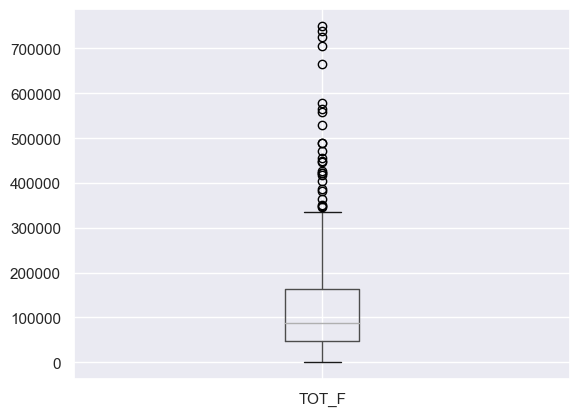

The description statistics for 'M_06' column is:


count      640.000000
mean     12309.098438
std      11500.906881
min         56.000000
25%       4733.750000
50%       9159.000000
75%      16520.250000
max      96223.000000
Name: M_06, dtype: float64


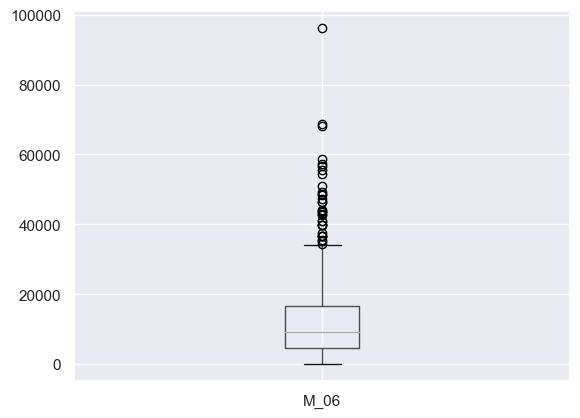

The description statistics for 'F_06' column is:


count      640.000000
mean     11942.300000
std      11326.294567
min         56.000000
25%       4672.250000
50%       8663.000000
75%      15902.250000
max      95129.000000
Name: F_06, dtype: float64


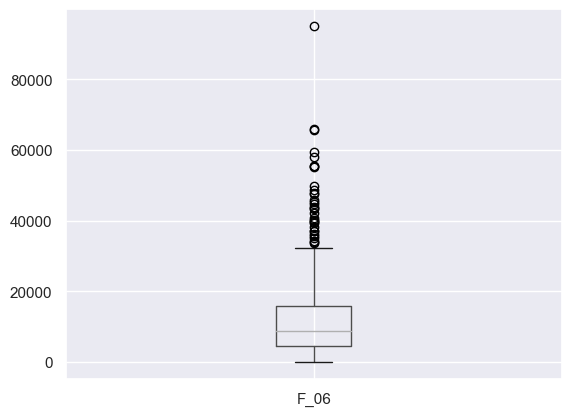

The description statistics for 'M_SC' column is:


count       640.000000
mean      13820.946875
std       14426.373130
min           0.000000
25%        3466.250000
50%        9591.500000
75%       19429.750000
max      103307.000000
Name: M_SC, dtype: float64


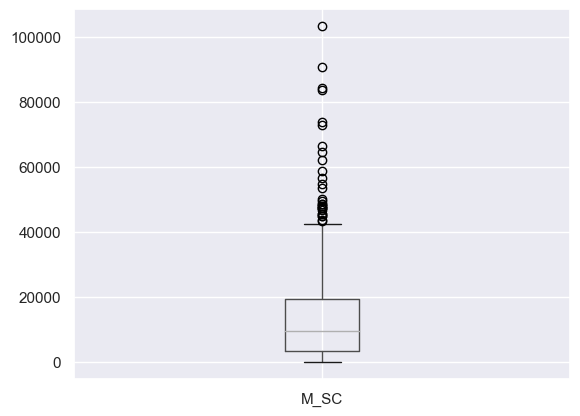

The description statistics for 'F_SC' column is:


count       640.000000
mean      20778.392188
std       21727.887713
min           0.000000
25%        5603.250000
50%       13709.000000
75%       29180.000000
max      156429.000000
Name: F_SC, dtype: float64


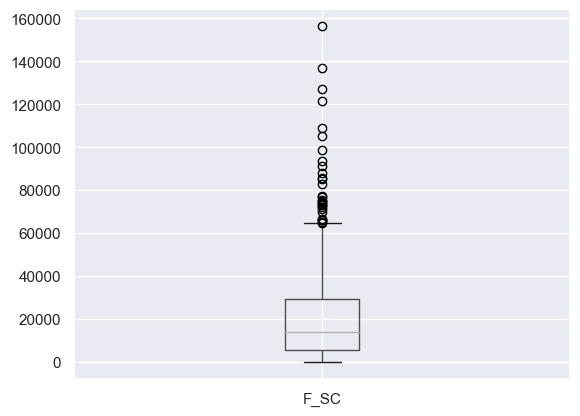

The description statistics for 'M_ST' column is:


count      640.000000
mean      6191.807813
std       9912.668948
min          0.000000
25%        293.750000
50%       2333.500000
75%       7658.000000
max      96785.000000
Name: M_ST, dtype: float64


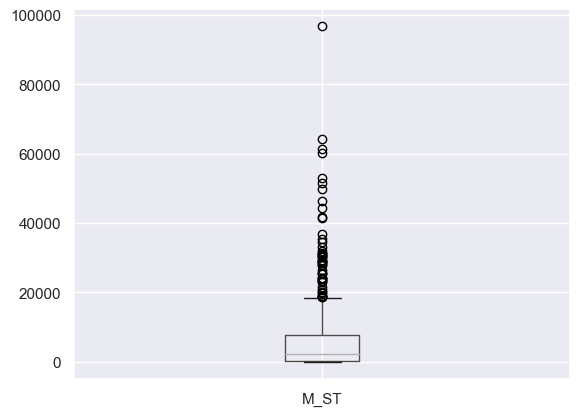

The description statistics for 'F_ST' column is:


count       640.000000
mean      10155.640625
std       15875.701488
min           0.000000
25%         429.500000
50%        3834.500000
75%       12480.250000
max      130119.000000
Name: F_ST, dtype: float64


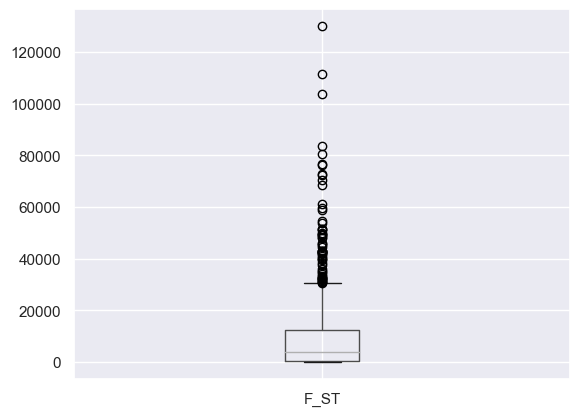

The description statistics for 'M_LIT' column is:


count       640.000000
mean      57967.979688
std       55910.282466
min         286.000000
25%       21298.000000
50%       42693.500000
75%       77989.500000
max      403261.000000
Name: M_LIT, dtype: float64


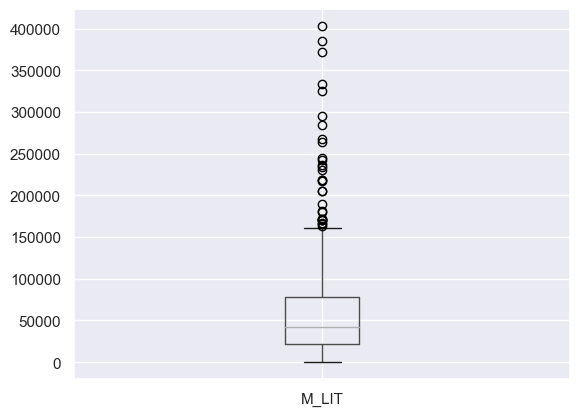

The description statistics for 'F_LIT' column is:


count       640.000000
mean      66359.565625
std       75037.860207
min         371.000000
25%       20932.000000
50%       43796.500000
75%       84799.750000
max      571140.000000
Name: F_LIT, dtype: float64


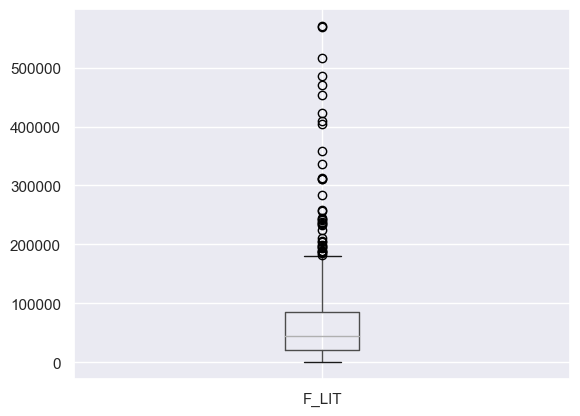

The description statistics for 'M_ILL' column is:


count       640.000000
mean      21972.596875
std       19825.605268
min         105.000000
25%        8590.000000
50%       15767.500000
75%       29512.500000
max      105961.000000
Name: M_ILL, dtype: float64


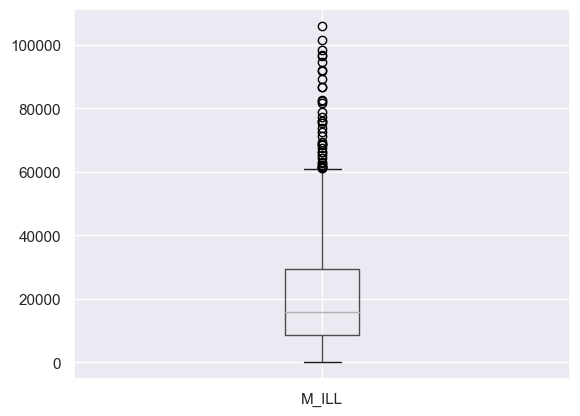

The description statistics for 'F_ILL' column is:


count       640.000000
mean      56012.518750
std       47116.693769
min         327.000000
25%       22367.000000
50%       42386.000000
75%       78471.000000
max      254160.000000
Name: F_ILL, dtype: float64


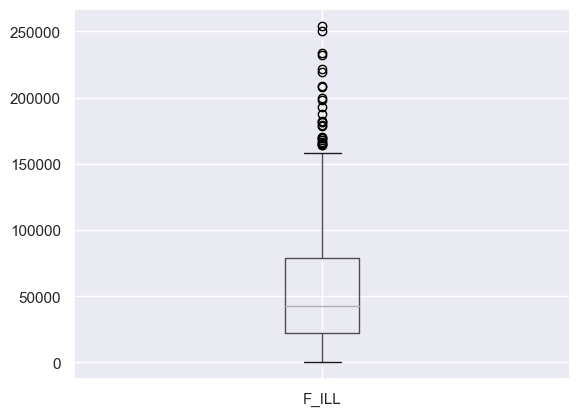

The description statistics for 'TOT_WORK_M' column is:


count       640.000000
mean      37992.407813
std       36419.537491
min         100.000000
25%       13753.500000
50%       27936.500000
75%       50226.750000
max      269422.000000
Name: TOT_WORK_M, dtype: float64


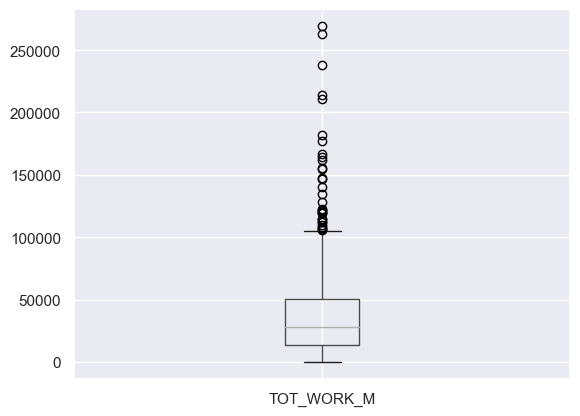

The description statistics for 'TOT_WORK_F' column is:


count       640.000000
mean      41295.760938
std       37192.360943
min         357.000000
25%       16097.750000
50%       30588.500000
75%       53234.250000
max      257848.000000
Name: TOT_WORK_F, dtype: float64


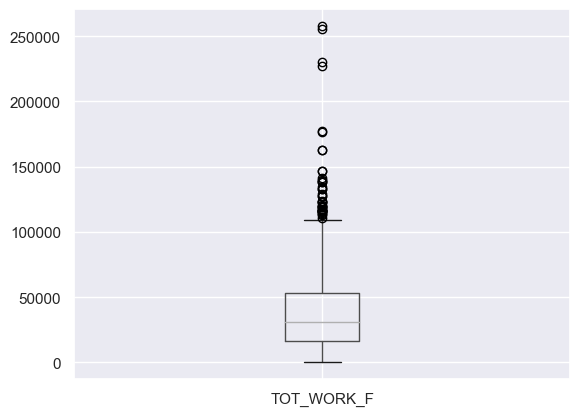

The description statistics for 'MAINWORK_M' column is:


count       640.000000
mean      30204.446875
std       31480.915680
min          65.000000
25%        9787.000000
50%       21250.500000
75%       40119.000000
max      247911.000000
Name: MAINWORK_M, dtype: float64


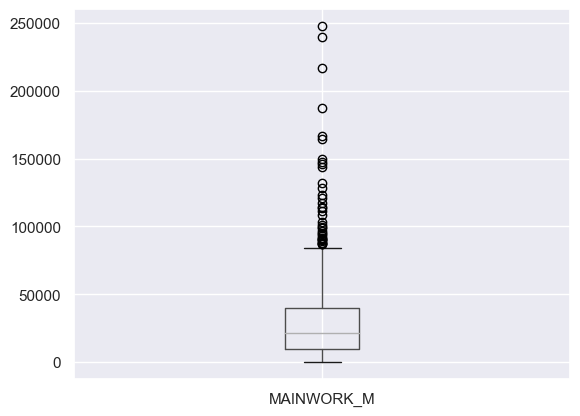

The description statistics for 'MAINWORK_F' column is:


count       640.000000
mean      28198.846875
std       29998.262689
min         240.000000
25%        9502.250000
50%       18484.000000
75%       35063.250000
max      226166.000000
Name: MAINWORK_F, dtype: float64


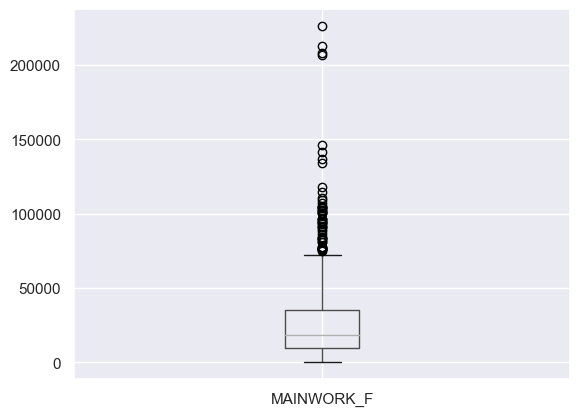

The description statistics for 'MAIN_CL_M' column is:


count      640.000000
mean      5424.342188
std       4739.161969
min          0.000000
25%       2023.500000
50%       4160.500000
75%       7695.000000
max      29113.000000
Name: MAIN_CL_M, dtype: float64


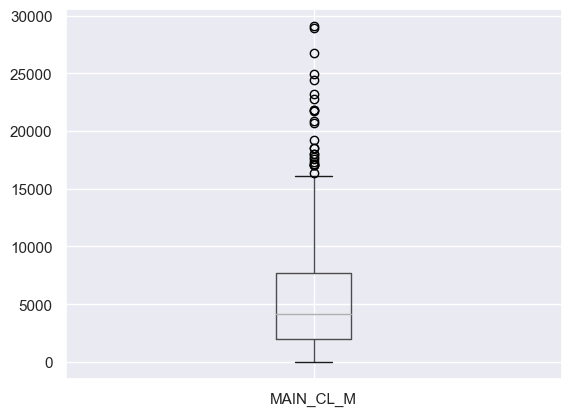

The description statistics for 'MAIN_CL_F' column is:


count      640.000000
mean      5486.042188
std       5326.362728
min          0.000000
25%       1920.250000
50%       3908.500000
75%       7286.250000
max      36193.000000
Name: MAIN_CL_F, dtype: float64


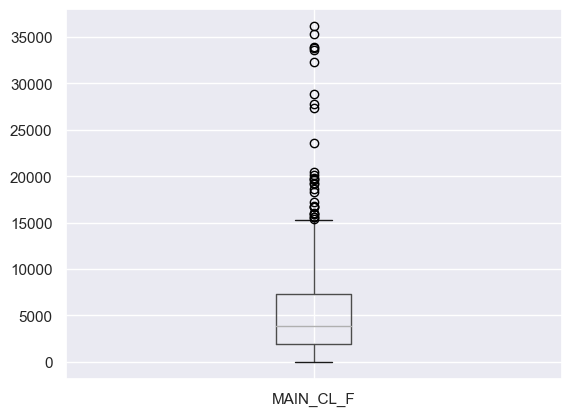

The description statistics for 'MAIN_AL_M' column is:


count      640.000000
mean      5849.109375
std       6399.507966
min          0.000000
25%       1070.250000
50%       3936.500000
75%       8067.250000
max      40843.000000
Name: MAIN_AL_M, dtype: float64


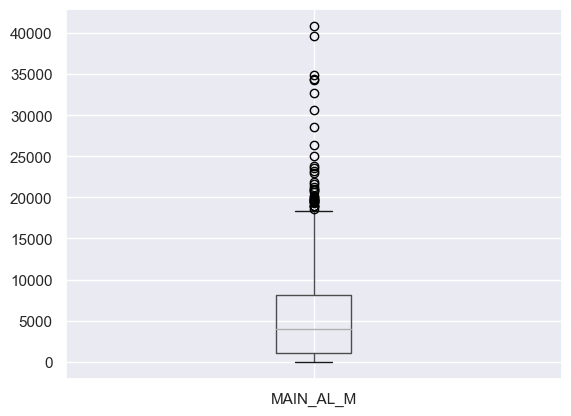

In [28]:
for i in range(0,20):
    print("The description statistics for '{}' column is:".format(listnumericcolumns[i]))
    print('\n')
    print(df[listnumericcolumns[i]].describe())
    df.boxplot(column=listnumericcolumns[i])
    plt.show()

In [29]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [30]:
q1 = df.quantile(0.25)
q2 = df.quantile(0.75)

In [31]:
IQR = q2 - q1

In [32]:
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - q2

In [33]:
df1.columns

Index(['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST',
       'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F',
       'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M',
       'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F',
       'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M',
       'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F',
       'MARGWORK_3_6_M', 'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F',
       'MARG_AL_3_6_M', 'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F',
       'MARG_OT_3_6_M', 'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F',
       'MARG_CL_0_3_M', 'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F',
       'MARG_HH_0_3_M', 'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F',
       'NON_WORK_M', 'NON_WORK_F'],
      dtype='object')

In [34]:
df_new = pd.DataFrame(np.where(df > max_limit, max_limit, 
         (np.where(df < min_limit, min_limit, df))),columns=['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST',
       'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F',
       'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M',
       'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F',
       'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M',
       'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F',
       'MARGWORK_3_6_M', 'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F',
       'MARG_AL_3_6_M', 'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F',
       'MARG_OT_3_6_M', 'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F',
       'MARG_CL_0_3_M', 'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F',
       'MARG_HH_0_3_M', 'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F',
       'NON_WORK_M', 'NON_WORK_F'])

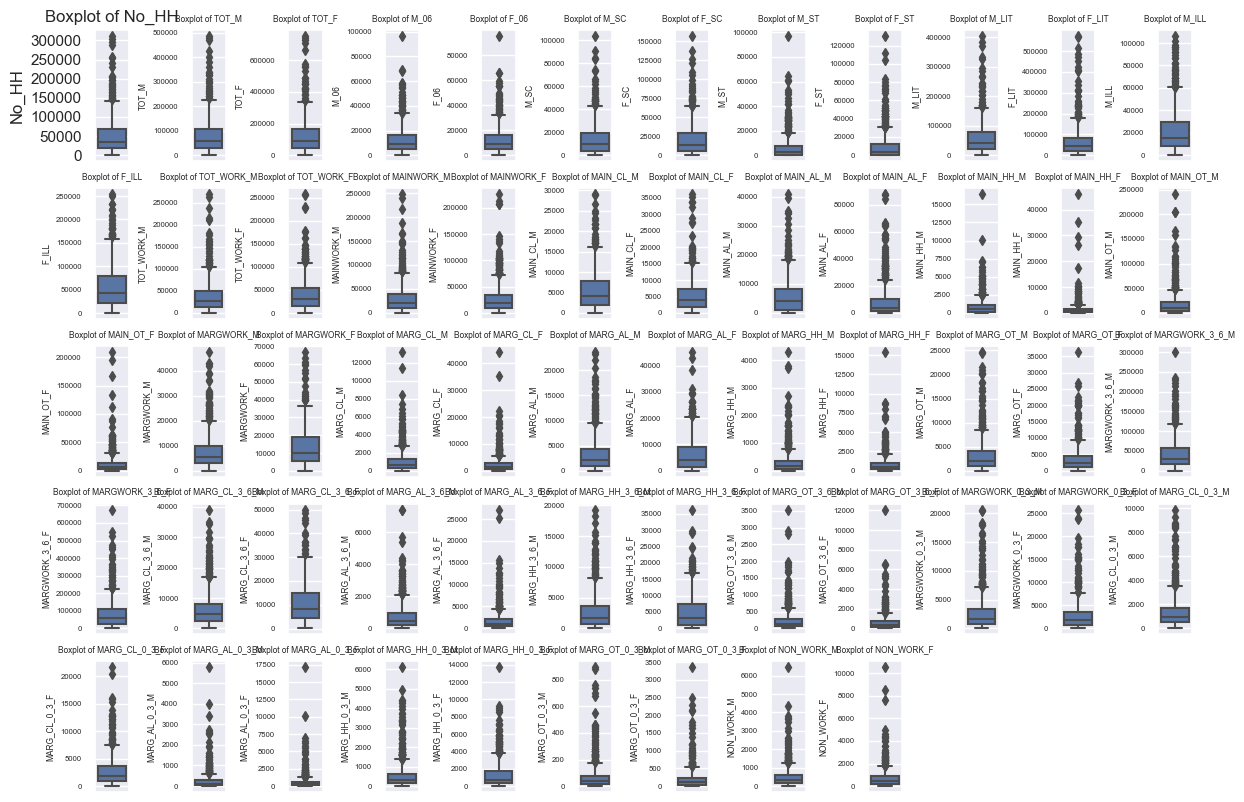

In [35]:
plt.figure(figsize = (12,8))
feature_list = df1.columns
for i in range(len(feature_list)):
    plt.subplot(5, 12, i + 1)
    sns.boxplot(y = df1[feature_list[i]], data = df1)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()
    sns.set(font_scale=0.5);

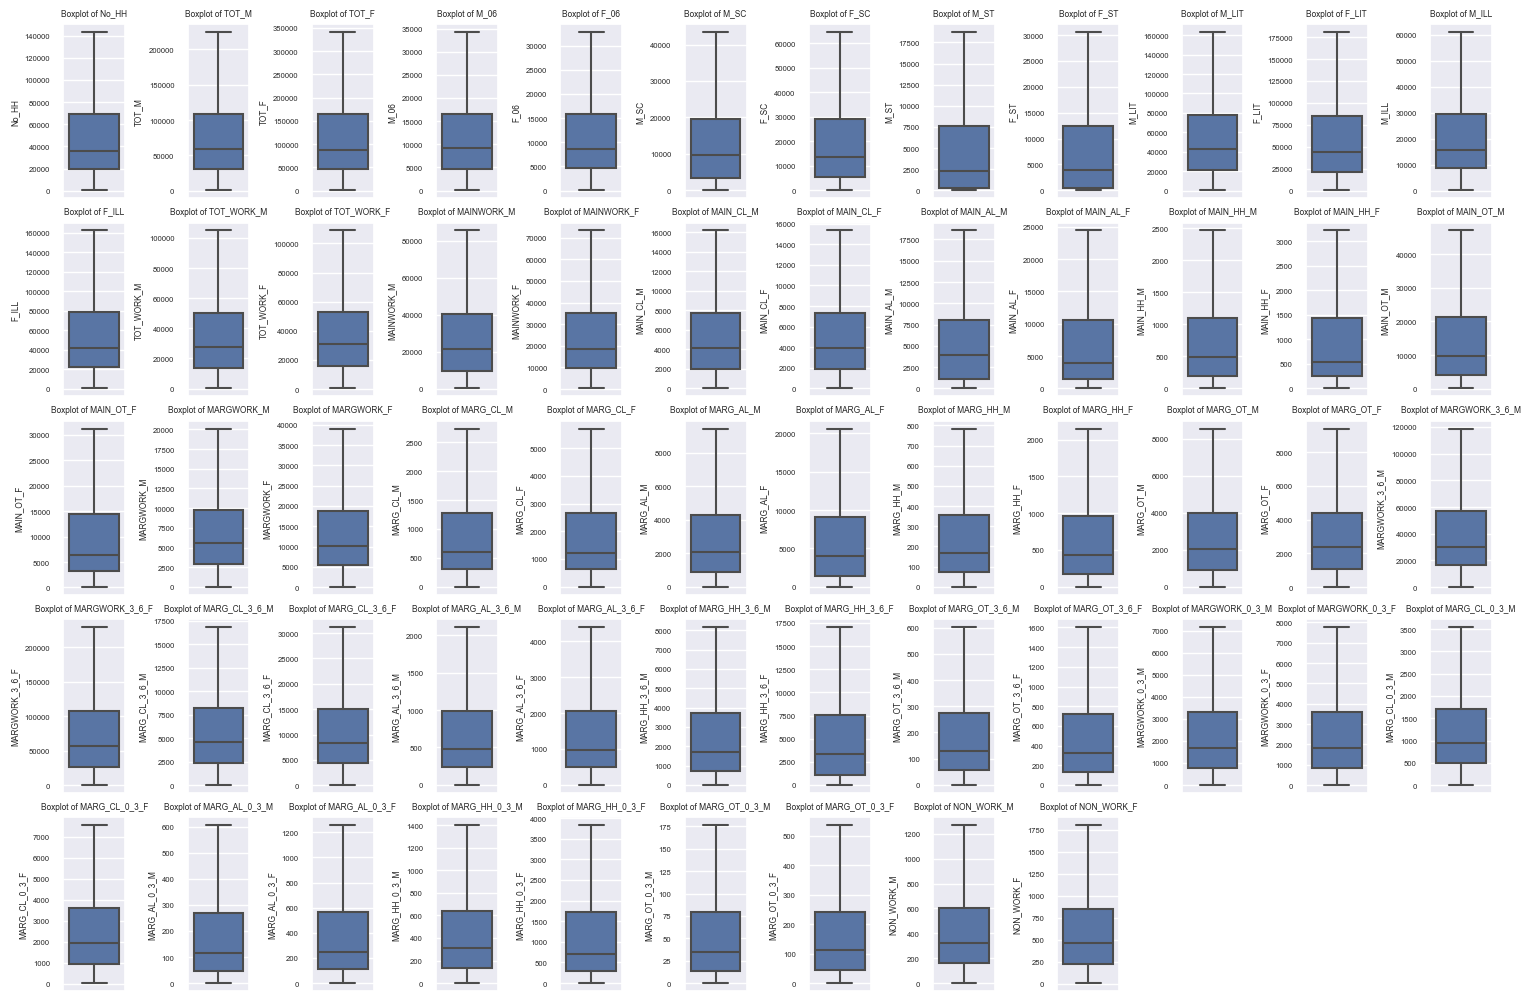

In [36]:
#Check for presence of outliers in each feature
plt.figure(figsize = (15,10))
feature_list = df_new.columns
for i in range(len(feature_list)):
    plt.subplot(5, 12, i + 1)
    sns.boxplot(y = df_new[feature_list[i]], data = df_new)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()
    sns.set(font_scale=0.5);

In [37]:
df_new.describe()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,48515.542188,76041.601953,116079.808594,11638.096875,11234.508203,13173.196875,19764.365039,5068.761133,8345.648047,54544.874219,...,1243.500000,2554.161719,187.805664,402.933008,456.679297,1157.905078,56.320312,164.198438,443.924219,609.501562
std,39308.008223,60233.862106,92154.544396,9253.649941,8983.799265,12201.892925,18315.276108,6018.652465,10017.707451,43843.469970,...,999.851461,2098.515606,186.884611,392.233200,426.951049,1142.279691,54.894326,156.264559,374.014651,510.812596
min,350.000000,391.000000,698.000000,56.000000,56.000000,0.000000,0.000000,0.000000,0.000000,286.000000,...,4.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,19484.000000,30228.000000,46517.750000,4733.750000,4672.250000,3466.250000,5603.250000,293.750000,429.500000,21298.000000,...,489.500000,957.250000,47.000000,109.000000,136.500000,298.000000,14.000000,43.000000,161.000000,220.500000
50%,35837.000000,58339.000000,87724.500000,9159.000000,8663.000000,9591.500000,13709.000000,2333.500000,3834.500000,42693.500000,...,949.000000,1928.000000,114.500000,247.500000,308.000000,717.000000,35.000000,113.000000,326.000000,464.500000
75%,68892.000000,107918.500000,164251.750000,16520.250000,15902.250000,19429.750000,29180.000000,7658.000000,12480.250000,77989.500000,...,1714.000000,3599.750000,270.750000,568.750000,642.000000,1710.750000,79.000000,240.000000,604.500000,853.500000
max,143004.000000,224454.250000,340852.750000,34200.000000,32747.250000,43375.000000,64545.125000,18704.375000,30556.375000,163026.750000,...,3550.750000,7563.500000,606.375000,1258.375000,1400.250000,3829.875000,176.500000,535.500000,1269.750000,1803.000000


In [38]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df_new), columns=df_new.columns)

In [39]:
df_scaled.head(5)

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.038986,-0.874837,-0.937027,-0.624685,-0.561282,-1.080201,-1.079963,-0.510440,-0.574198,-0.939617,...,-0.093587,-0.860882,-0.041800,-0.423378,0.523468,-0.793688,-0.443385,-0.756991,-0.497493,-0.774865
1,-1.076896,-0.938023,-1.009723,-0.773932,-0.835657,-1.079873,-1.079635,-0.771833,-0.782092,-1.005083,...,-0.719169,-0.877096,-0.347040,-0.443790,-0.634478,-0.884805,0.358782,0.088391,-0.813235,-0.880662
2,-1.121858,-1.154665,-1.141539,-1.141642,-1.138104,-1.080201,-1.079635,0.122588,0.137599,-1.141561,...,-1.130551,-1.128423,-0.770091,-0.800999,-1.063434,-0.984684,-1.026779,-1.025976,-1.008568,-1.074622
3,-1.201599,-1.217171,-1.214930,-1.197772,-1.176091,-1.080447,-1.079963,-0.399531,-0.437333,-1.203009,...,-1.050477,-1.100286,-0.679055,-0.701491,-1.039994,-0.970666,-0.953855,-0.987550,-0.877454,-1.078541
4,-0.938495,-0.921309,-0.935018,-0.700931,-0.740523,-1.078807,-1.078160,0.432534,0.249489,-0.942767,...,-0.369844,-0.298617,1.484398,1.633130,-0.589942,-0.749882,-0.589234,-0.379131,-0.706204,-0.257637


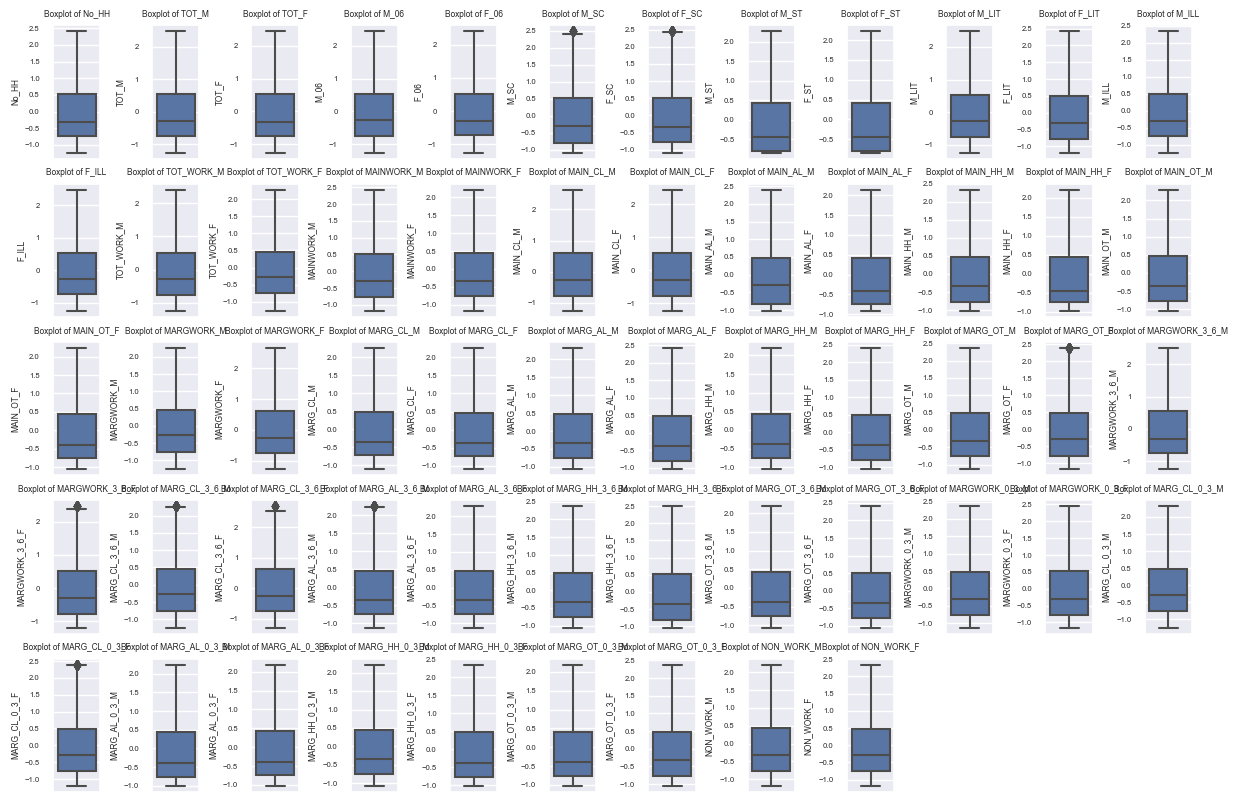

In [40]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = df_scaled.columns
for i in range(len(feature_list)):
    plt.subplot(5, 12, i + 1)
    sns.boxplot(y =df_scaled[feature_list[i]], data = df_scaled)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [41]:
df_scaled.describe()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,640.000000,6.400000e+02,...,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02
mean,-6.661338e-17,-1.332268e-16,-2.220446e-17,5.551115e-17,-3.330669e-17,2.220446e-17,-2.220446e-17,-4.440892e-17,0.000000,-7.771561e-17,...,-1.387779e-17,-3.330669e-17,-2.220446e-17,-6.661338e-17,2.220446e-17,0.000000,-2.220446e-17,-7.216450e-17,-6.661338e-17,4.440892e-17
std,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782,1.000782e+00,...,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00
min,-1.226295e+00,-1.256930e+00,-1.253026e+00,-1.252604e+00,-1.245270e+00,-1.080447e+00,-1.079963e+00,-8.428341e-01,-0.833741,-1.238527e+00,...,-1.240654e+00,-1.203773e+00,-1.005714e+00,-1.028083e+00,-1.070466e+00,-1.014472,-1.026779e+00,-1.051594e+00,-1.187845e+00,-1.184337e+00
25%,-7.391433e-01,-7.611904e-01,-7.554317e-01,-7.467051e-01,-7.310260e-01,-7.961502e-01,-7.737908e-01,-7.939894e-01,-0.790834,-7.589016e-01,...,-7.547019e-01,-7.615673e-01,-7.540257e-01,-7.499694e-01,-7.505070e-01,-0.753386,-7.715445e-01,-7.762044e-01,-7.570439e-01,-7.621304e-01
50%,-3.227958e-01,-2.941277e-01,-3.079337e-01,-2.681143e-01,-2.864623e-01,-2.937658e-01,-3.308769e-01,-4.548195e-01,-0.450670,-2.705225e-01,...,-2.947741e-01,-2.986165e-01,-3.925577e-01,-3.965870e-01,-3.485074e-01,-0.386289,-3.886921e-01,-3.278957e-01,-3.155397e-01,-2.840865e-01
75%,5.187848e-01,5.296328e-01,5.231388e-01,5.280048e-01,5.199796e-01,5.131537e-01,5.144885e-01,4.305389e-01,0.413052,5.351530e-01,...,4.709380e-01,4.986411e-01,4.441736e-01,4.230817e-01,4.343956e-01,0.484362,4.134749e-01,4.854642e-01,4.296660e-01,4.780408e-01
max,2.405677e+00,2.465868e+00,2.440995e+00,2.440070e+00,2.396488e+00,2.477110e+00,2.446907e+00,2.267331e+00,2.218881,2.476235e+00,...,2.309398e+00,2.388954e+00,2.241473e+00,2.182658e+00,2.211749e+00,2.340985,2.191004e+00,2.377967e+00,2.209731e+00,2.338298e+00


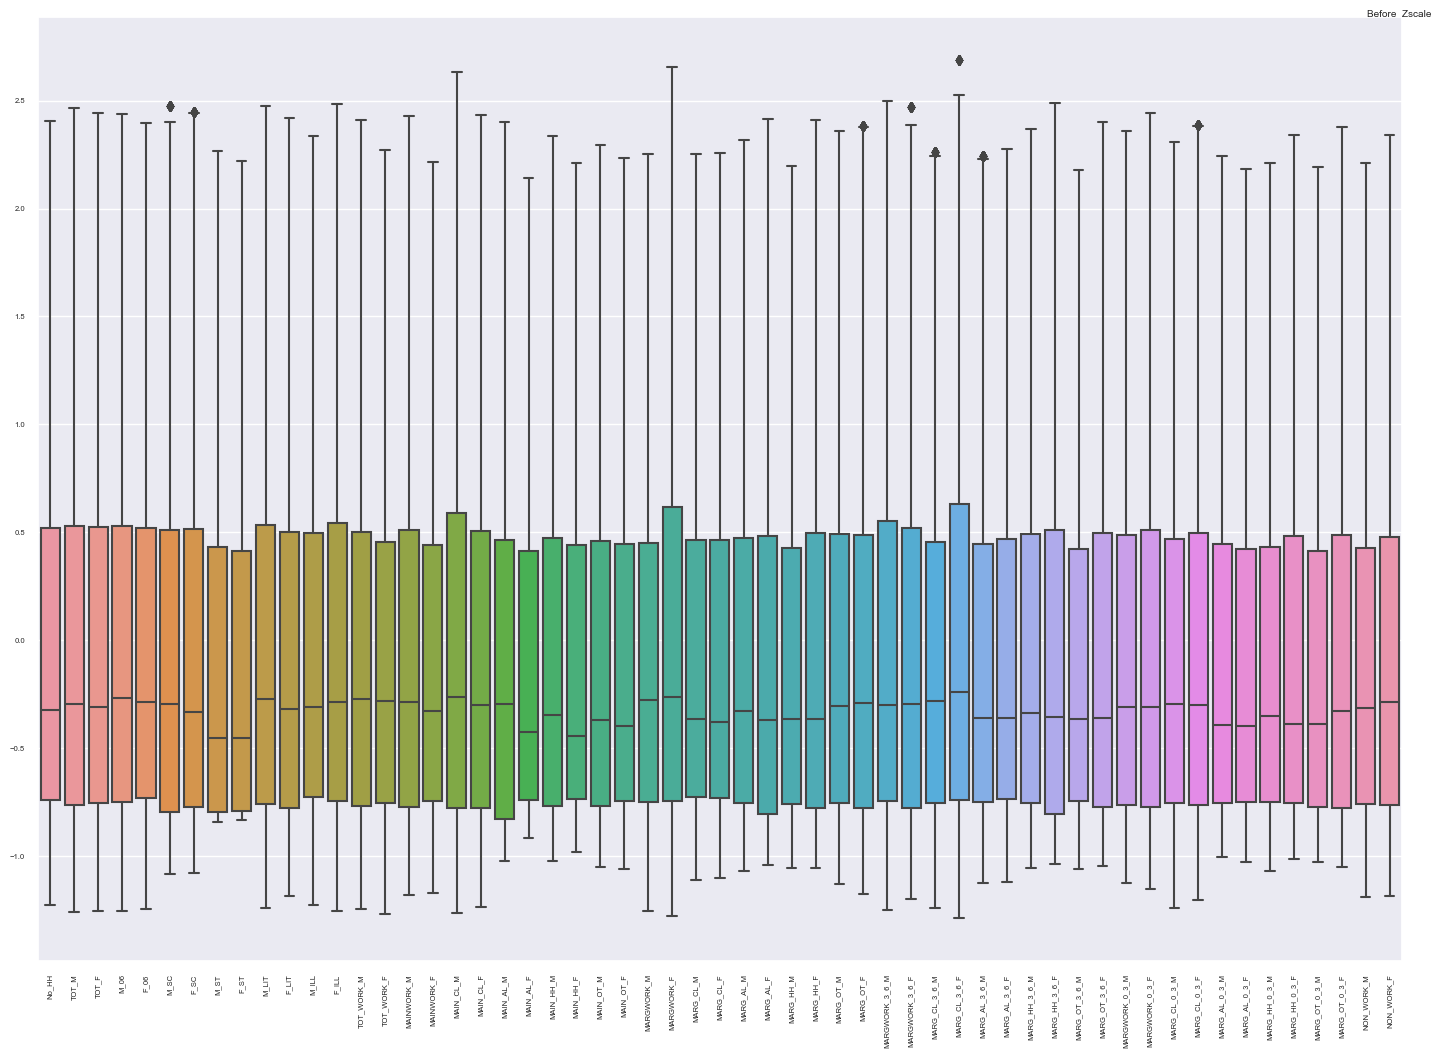

In [42]:
plt.figure(figsize=(28,10))
plt.suptitle("Before  Zscale ")
plt.subplot(1,2,1)
sns.boxplot(data = df_scaled)
plt.tight_layout()
sns.set(font_scale=2)
plt.xticks(rotation=90)
plt.show()

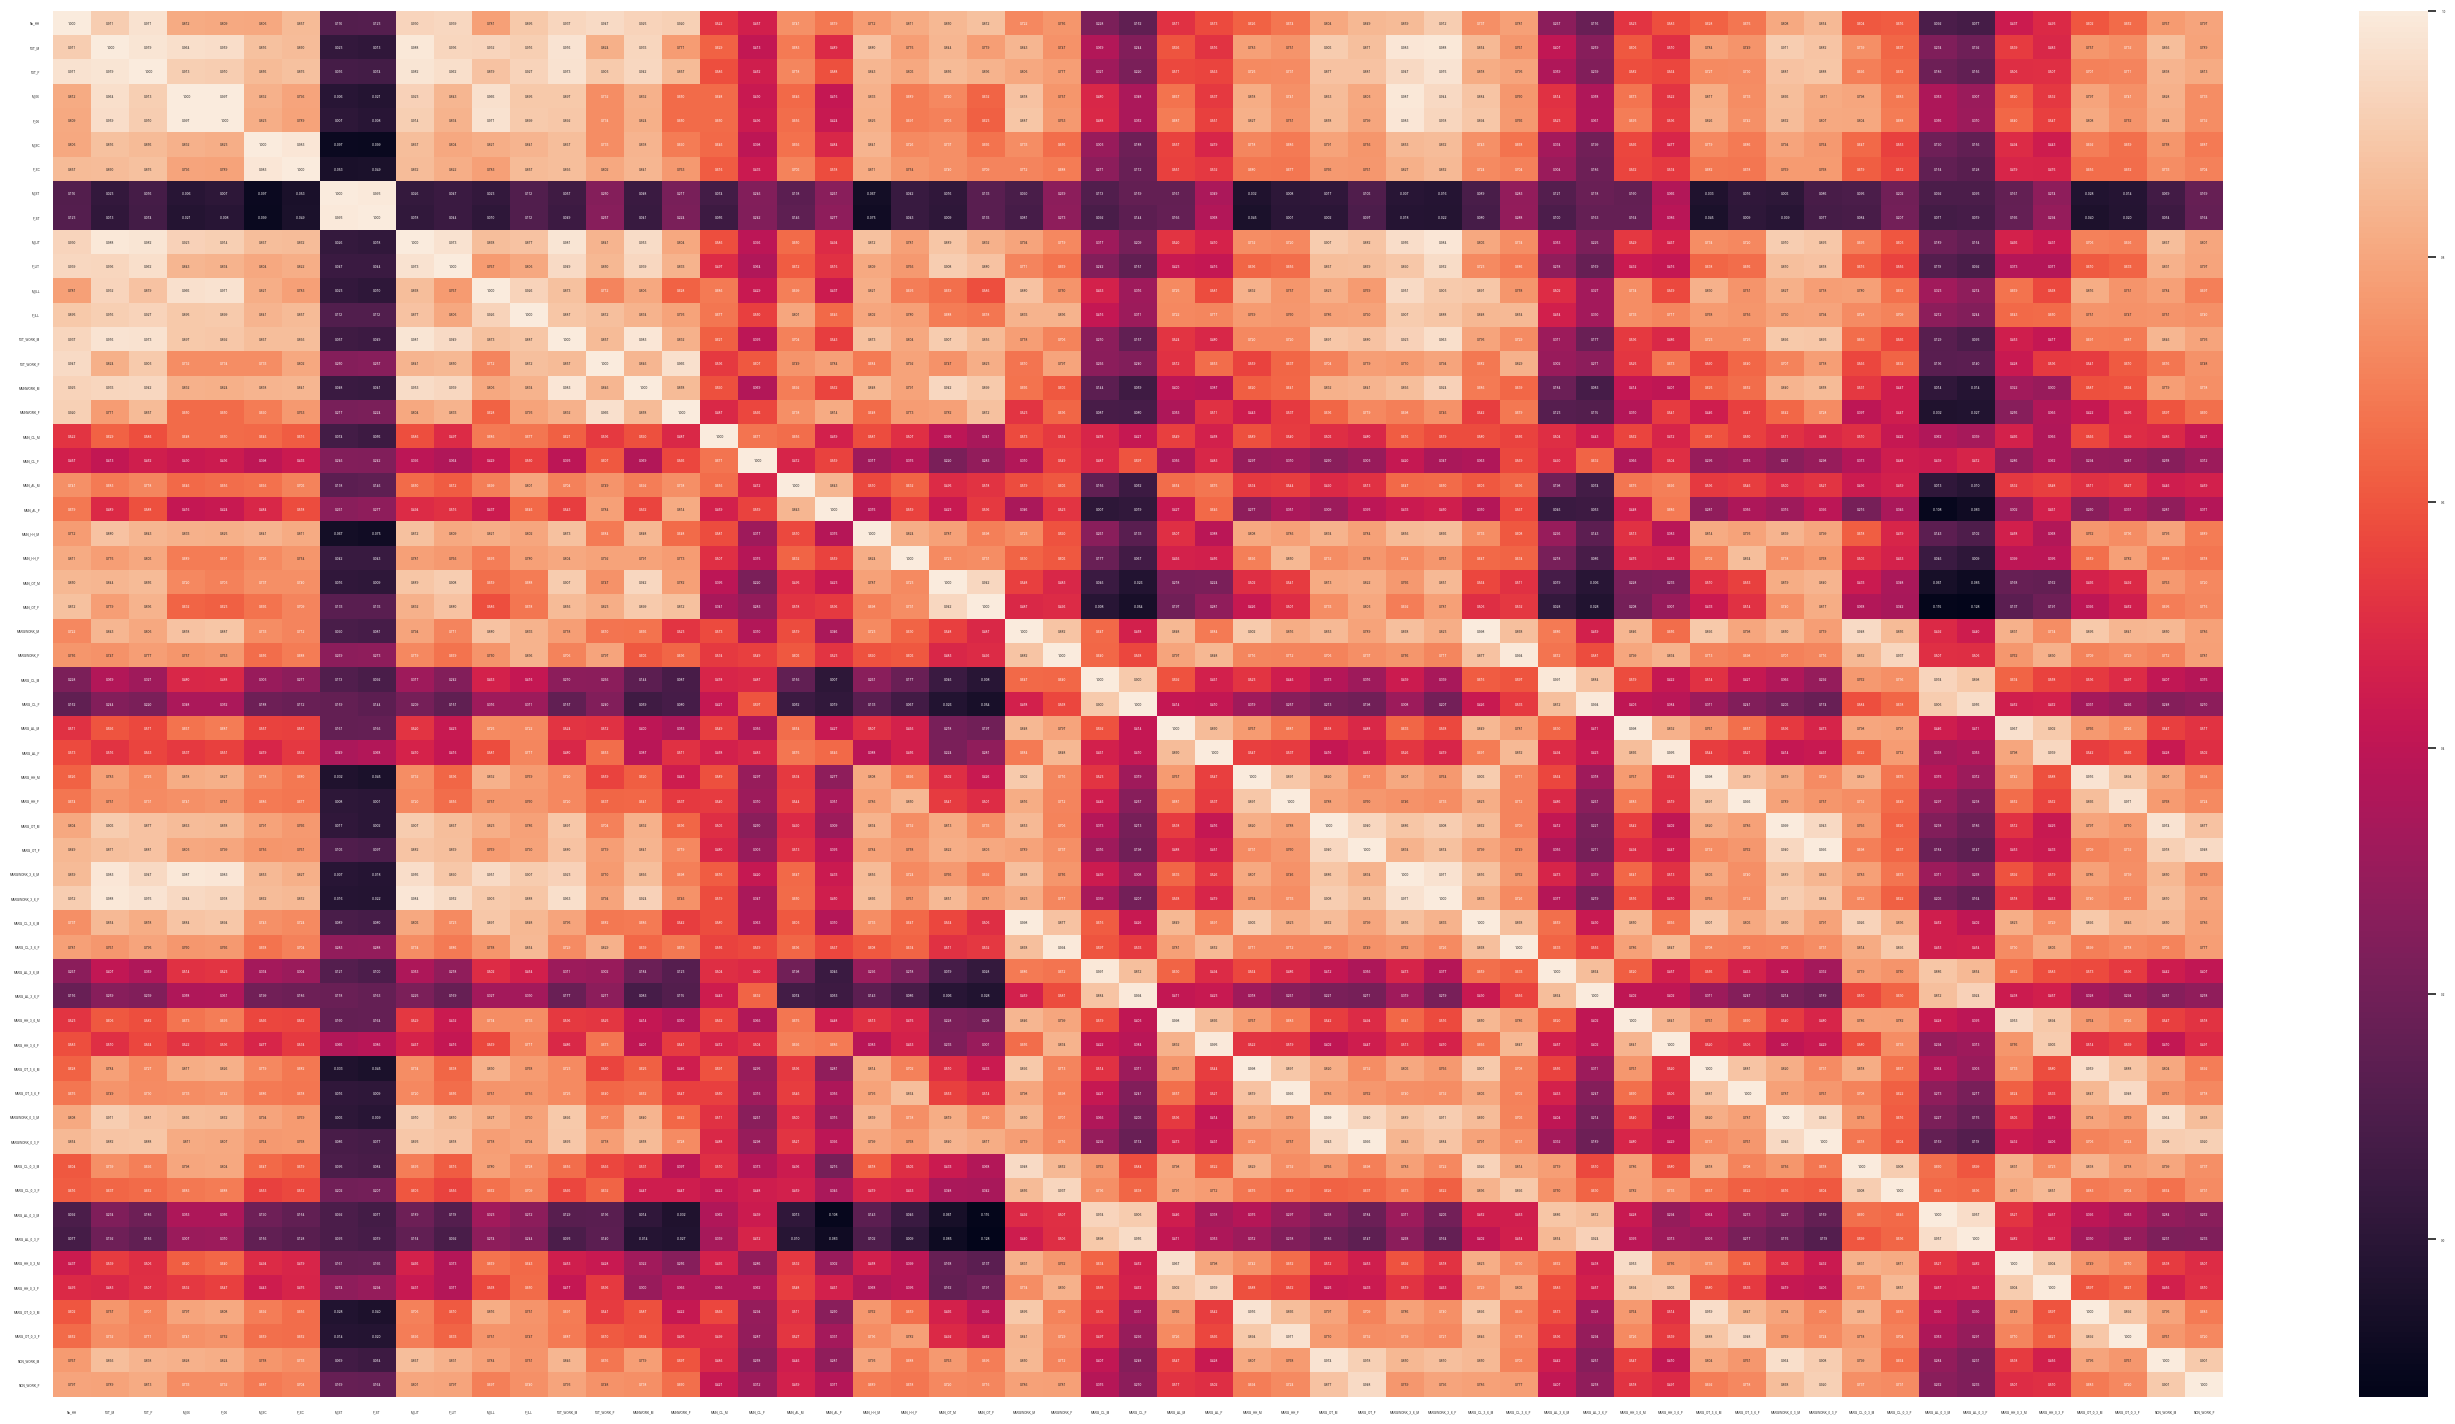

In [43]:
#Check for presence of correlations
plt.figure(figsize = (35,18))
sns.set(font_scale=0.2)
sns.heatmap(df_scaled.corr(), annot=True,fmt='.3f');

In [44]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled)
p_value

0.0

In [45]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

0.9361896166653618

In [46]:
df_num = df_scaled.select_dtypes(include = ['float64', 'int64'])
listnumericcolumns = list(df_num.columns.values)
len(listnumericcolumns)

57

In [47]:
type(listnumericcolumns)

list

In [48]:
df_scaled.cov()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
No_HH,1.001565,0.912699,0.973013,0.812856,0.809883,0.806713,0.858562,0.116300,0.122722,0.931350,...,0.604943,0.617144,0.092397,0.076751,0.437333,0.493311,0.603073,0.652762,0.768401,0.797884
TOT_M,0.912699,1.001565,0.980122,0.965044,0.960153,0.877158,0.861703,0.023439,0.013301,0.989312,...,0.739665,0.637775,0.233968,0.192672,0.539800,0.483744,0.758514,0.732832,0.866166,0.790717
TOT_F,0.973013,0.980122,1.001565,0.914418,0.911167,0.857664,0.876435,0.076189,0.074248,0.983281,...,0.697119,0.652550,0.185162,0.155547,0.506240,0.508029,0.702366,0.711878,0.839647,0.814642
M_06,0.812856,0.965044,0.914418,1.001565,0.999032,0.833344,0.796794,-0.006081,-0.021166,0.924761,...,0.799076,0.683667,0.353449,0.307655,0.621332,0.532533,0.797963,0.742066,0.829536,0.734333
F_06,0.809883,0.960153,0.911167,0.999032,1.001565,0.823888,0.790043,0.006803,-0.007896,0.915929,...,0.805050,0.689114,0.356906,0.310399,0.640604,0.547595,0.808822,0.753617,0.824994,0.732957
M_SC,0.806713,0.877158,0.857664,0.833344,0.823888,1.001565,0.984688,-0.096913,-0.099226,0.868007,...,0.647698,0.554284,0.189858,0.154856,0.494407,0.443808,0.693266,0.659936,0.758797,0.687931
F_SC,0.858562,0.861703,0.876435,0.796794,0.790043,0.984688,1.001565,-0.052859,-0.048597,0.862923,...,0.620049,0.572684,0.154704,0.128156,0.480220,0.475952,0.656155,0.653299,0.734524,0.705050
M_ST,0.116300,0.023439,0.076189,-0.006081,0.006803,-0.096913,-0.052859,1.001565,0.994481,0.026290,...,0.094899,0.202219,0.092618,0.093485,0.161701,0.274599,-0.027725,-0.014130,0.068662,0.169367
F_ST,0.122722,0.013301,0.074248,-0.021166,-0.007896,-0.099226,-0.048597,0.994481,1.001565,0.017617,...,0.083930,0.207070,0.071554,0.079261,0.166176,0.293964,-0.040368,-0.020496,0.053917,0.164084
M_LIT,0.931350,0.989312,0.983281,0.924761,0.915929,0.868007,0.862923,0.026290,0.017617,1.001565,...,0.694535,0.603799,0.189276,0.154402,0.466936,0.431918,0.705605,0.696924,0.868146,0.802336


In [49]:
np.array(df_scaled.cov())

array([[1.00156495, 0.91269889, 0.973013  , ..., 0.65276151, 0.76840117,
        0.79788409],
       [0.91269889, 1.00156495, 0.98012187, ..., 0.7328315 , 0.86616581,
        0.79071666],
       [0.973013  , 0.98012187, 1.00156495, ..., 0.71187751, 0.83964667,
        0.81464163],
       ...,
       [0.65276151, 0.7328315 , 0.71187751, ..., 1.00156495, 0.76249106,
        0.72075284],
       [0.76840117, 0.86616581, 0.83964667, ..., 0.76249106, 1.00156495,
        0.90224595],
       [0.79788409, 0.79071666, 0.81464163, ..., 0.72075284, 0.90224595,
        1.00156495]])

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=33, random_state=1)
df_pca = pca.fit_transform(df_scaled)
df_pca.transpose()

array([[-5.52816148e+00, -5.49201646e+00, -7.47464297e+00, ...,
        -7.88626804e+00, -7.86425952e+00, -7.41622568e+00],
       [ 4.30377559e-01, -1.06110331e-01, -2.17193764e-01, ...,
        -1.00353656e+00, -9.99337996e-01, -1.41214300e+00],
       [-1.47382695e+00, -2.01564100e+00, -2.47428211e-01, ...,
        -9.09284569e-01, -8.51569237e-01, -8.65921210e-01],
       ...,
       [-3.98812945e-02, -9.45135592e-02,  4.93890354e-02, ...,
        -3.93563066e-02,  5.63117388e-03,  2.39781144e-03],
       [-1.94031657e-01, -1.85523769e-02,  1.40027710e-01, ...,
         1.46180165e-02,  2.02500353e-02,  2.32817820e-02],
       [-1.20416307e-01,  3.75335933e-02,  4.17672235e-02, ...,
         3.04567894e-02,  1.84414140e-02,  2.50113927e-02]])

In [51]:
pca.components_.T

array([[ 0.14922158, -0.11548673,  0.1015276 , ...,  0.07295765,
         0.07640292, -0.55722406],
       [ 0.15916917, -0.08023879, -0.03866173, ..., -0.03960222,
        -0.04156952,  0.14682084],
       [ 0.15820921, -0.09371751,  0.0289595 , ..., -0.03454995,
         0.0237684 ,  0.00136677],
       ...,
       [ 0.14136961,  0.03510934, -0.10217491, ...,  0.13002216,
        -0.26186379,  0.14135709],
       [ 0.14762899, -0.04912234, -0.12667281, ..., -0.04711765,
        -0.08388199,  0.00682332],
       [ 0.14210263, -0.03984815, -0.02854464, ...,  0.20462588,
         0.014771  ,  0.01165655]])

In [52]:
df_pca.shape

(640, 33)

In [53]:
print('Eigen Vectors \n %s',pca.components_)

Eigen Vectors 
 %s [[ 0.14922158  0.15916917  0.15820921 ...  0.14136961  0.14762899
   0.14210263]
 [-0.11548673 -0.08023879 -0.09371751 ...  0.03510934 -0.04912234
  -0.03984815]
 [ 0.1015276  -0.03866173  0.0289595  ... -0.10217491 -0.12667281
  -0.02854464]
 ...
 [ 0.07295765 -0.03960222 -0.03454995 ...  0.13002216 -0.04711765
   0.20462588]
 [ 0.07640292 -0.04156952  0.0237684  ... -0.26186379 -0.08388199
   0.014771  ]
 [-0.55722406  0.14682084  0.00136677 ...  0.14135709  0.00682332
   0.01165655]]


In [54]:
pca.components_.shape

(33, 57)

In [55]:
variance_exp = pca.explained_variance_ratio_
print(variance_exp)

[6.24441446e-01 1.33888289e-01 6.60229147e-02 4.86470891e-02
 3.34029704e-02 2.02297994e-02 1.73014629e-02 8.13866529e-03
 6.94892379e-03 5.64637229e-03 4.78562250e-03 4.12770833e-03
 3.17750294e-03 2.96454958e-03 2.42764517e-03 2.30351534e-03
 1.81837655e-03 1.67340548e-03 1.50392785e-03 1.41732362e-03
 1.15639919e-03 1.10493400e-03 8.45617224e-04 8.04891611e-04
 7.66778221e-04 5.59369722e-04 5.01311201e-04 4.82545623e-04
 4.10480504e-04 3.85881758e-04 3.28410688e-04 2.78520087e-04
 2.45156544e-04]


In [56]:
variance_exp.shape

(33,)

In [57]:
cum_var_exp = np.cumsum(variance_exp)
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(5))
cum_var_exp

Cumulative Variance Explained in Percentage: [62.44414 75.83297 82.43527 87.29997 90.64027 92.66325 94.3934  95.20726
 95.90216 96.46679 96.94536 97.35813 97.67588 97.97233 98.2151  98.44545
 98.62729 98.79463 98.94502 99.08675 99.20239 99.31288 99.39745 99.47794
 99.55461 99.61055 99.66068 99.70894 99.74998 99.78857 99.82141 99.84927
 99.87378]


array([0.62444145, 0.75832974, 0.82435265, 0.87299974, 0.90640271,
       0.92663251, 0.94393397, 0.95207264, 0.95902156, 0.96466793,
       0.96945356, 0.97358126, 0.97675877, 0.97972332, 0.98215096,
       0.98445448, 0.98627285, 0.98794626, 0.98945019, 0.99086751,
       0.99202391, 0.99312884, 0.99397446, 0.99477935, 0.99554613,
       0.9961055 , 0.99660681, 0.99708936, 0.99749984, 0.99788572,
       0.99821413, 0.99849265, 0.99873781])

In [58]:
pca.components_

array([[ 0.14922158,  0.15916917,  0.15820921, ...,  0.14136961,
         0.14762899,  0.14210263],
       [-0.11548673, -0.08023879, -0.09371751, ...,  0.03510934,
        -0.04912234, -0.03984815],
       [ 0.1015276 , -0.03866173,  0.0289595 , ..., -0.10217491,
        -0.12667281, -0.02854464],
       ...,
       [ 0.07295765, -0.03960222, -0.03454995, ...,  0.13002216,
        -0.04711765,  0.20462588],
       [ 0.07640292, -0.04156952,  0.0237684 , ..., -0.26186379,
        -0.08388199,  0.014771  ],
       [-0.55722406,  0.14682084,  0.00136677, ...,  0.14135709,
         0.00682332,  0.01165655]])

In [59]:
# EIGEN VALUES
pca.explained_variance_

array([3.56488638e+01, 7.64357559e+00, 3.76919551e+00, 2.77722349e+00,
       1.90694892e+00, 1.15490310e+00, 9.87726707e-01, 4.64629906e-01,
       3.96708513e-01, 3.22346888e-01, 2.73207369e-01, 2.35647574e-01,
       1.81401107e-01, 1.69243770e-01, 1.38592325e-01, 1.31505852e-01,
       1.03809666e-01, 9.55333831e-02, 8.58580407e-02, 8.09138742e-02,
       6.60179067e-02, 6.30797999e-02, 4.82756124e-02, 4.59506197e-02,
       4.37747566e-02, 3.19339710e-02, 2.86194563e-02, 2.75481445e-02,
       2.34340044e-02, 2.20296816e-02, 1.87487040e-02, 1.59004895e-02,
       1.39957914e-02])

In [60]:
pca.explained_variance_ratio_

array([6.24441446e-01, 1.33888289e-01, 6.60229147e-02, 4.86470891e-02,
       3.34029704e-02, 2.02297994e-02, 1.73014629e-02, 8.13866529e-03,
       6.94892379e-03, 5.64637229e-03, 4.78562250e-03, 4.12770833e-03,
       3.17750294e-03, 2.96454958e-03, 2.42764517e-03, 2.30351534e-03,
       1.81837655e-03, 1.67340548e-03, 1.50392785e-03, 1.41732362e-03,
       1.15639919e-03, 1.10493400e-03, 8.45617224e-04, 8.04891611e-04,
       7.66778221e-04, 5.59369722e-04, 5.01311201e-04, 4.82545623e-04,
       4.10480504e-04, 3.85881758e-04, 3.28410688e-04, 2.78520087e-04,
       2.45156544e-04])

In [61]:
import numpy as np
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
cumulative_sum

array([0.62444145, 0.75832974, 0.82435265, 0.87299974, 0.90640271,
       0.92663251, 0.94393397, 0.95207264, 0.95902156, 0.96466793,
       0.96945356, 0.97358126, 0.97675877, 0.97972332, 0.98215096,
       0.98445448, 0.98627285, 0.98794626, 0.98945019, 0.99086751,
       0.99202391, 0.99312884, 0.99397446, 0.99477935, 0.99554613,
       0.9961055 , 0.99660681, 0.99708936, 0.99749984, 0.99788572,
       0.99821413, 0.99849265, 0.99873781])

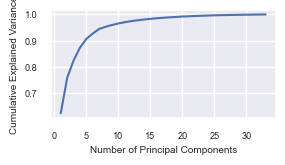

In [71]:
import matplotlib.pyplot as plt
plt.subplot(3,2,i+1)
sns.set(font_scale=0.6)

plt.plot(range(1,len(cumulative_sum)+1),cumulative_sum)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(df_scaled)


PCA()

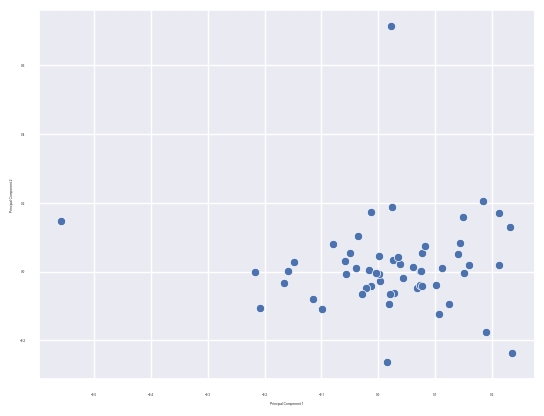

In [64]:
import seaborn as sns

sns.scatterplot(x=pca.components_[:,0],y=pca.components_[:,1])
plt.xlabel('Principal Component 1')

plt.ylabel('Principal Component 2')
plt.show()

In [73]:
num_components = 6
pca = PCA(n_components=num_components)
pca_components_ = pca.fit_transform(df_scaled)
loadings = pd.DataFrame(pca.components_.T, 
                        columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6'], 
                        index=df_scaled.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
No_HH,0.149222,-0.115487,0.101528,0.076814,-0.012090,0.082558
TOT_M,0.159169,-0.080239,-0.038662,0.052976,-0.042344,0.073667
TOT_F,0.158209,-0.093718,0.028959,0.070022,-0.022927,0.082812
M_06,0.156340,-0.020341,-0.074419,0.028520,-0.080339,0.092379
F_06,0.156814,-0.014310,-0.068223,0.016398,-0.078327,0.080010
M_SC,0.143350,-0.079667,-0.037619,0.010210,-0.167893,0.050969
F_SC,0.143537,-0.087098,0.021350,0.016244,-0.158092,0.054567
M_ST,0.018849,0.069101,0.323827,0.091143,0.418412,-0.231809
F_ST,0.017878,0.067316,0.338705,0.079554,0.415965,-0.214543
M_LIT,0.155152,-0.105986,-0.032107,0.089187,-0.014033,0.081378


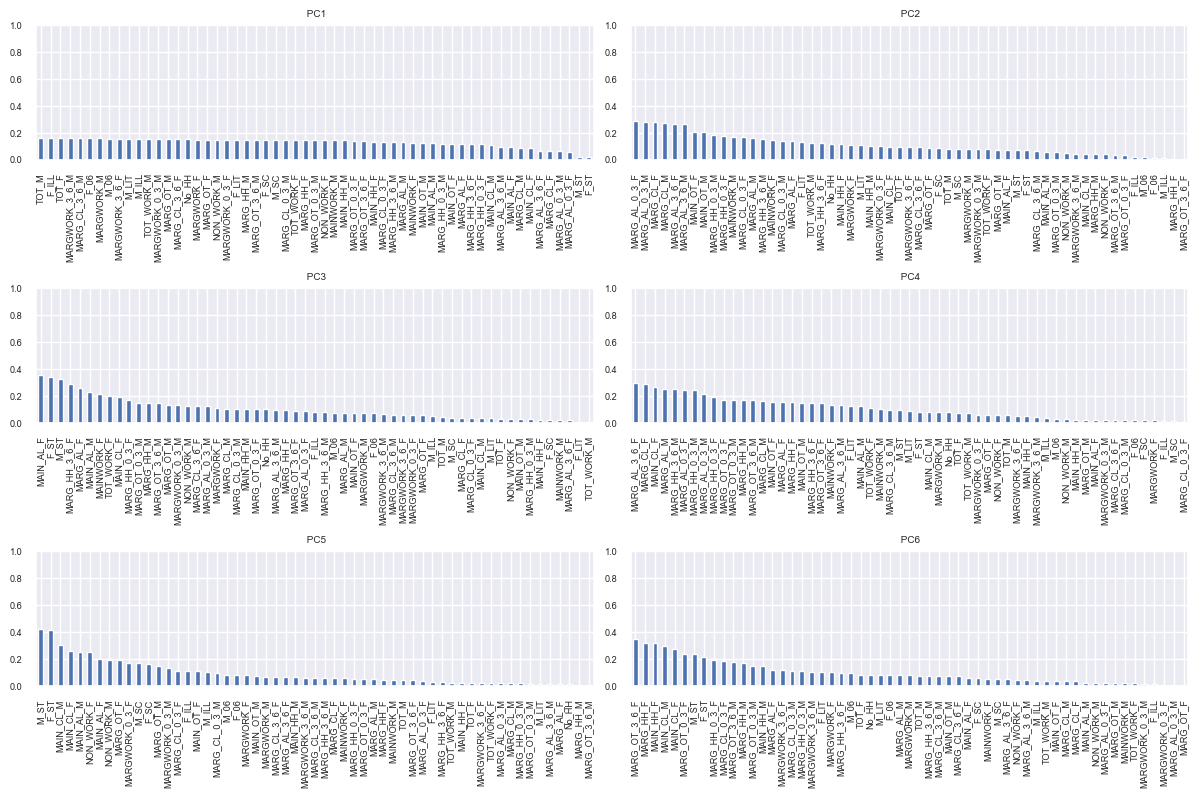

In [74]:
plt.figure(figsize = (12,8))
for i in range(len(loadings.columns)):
    plt.subplot(3,2,i+1)
    sns.set(font_scale=0.6)
    abs(loadings[loadings.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title(' {}'.format(loadings.columns[i]))
    plt.tight_layout()
